<h1>Características visuales y escalas</h1>

Aunque ya se ha adelantado algo al revisar los diferentes tipos de gráfico, vamos a revisar cómo definir y gestionar el mapeo de diferentes características visuales en nuestros gráficos. Es decir, vamos a ver el "equivalente" a los aesthetics de ggplot2.

Empecemos, como siempre, por importar el módulo y dejar los sets de datos cargados para las pruebas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mtcars = pd.read_table("mtcars.txt", sep = ",")
diamonds = pd.read_table("diamonds.txt", sep = ",")

<h2>Colores</h2>

Matplotlib incluye estilos y paletas por defecto para todas las funciones y tipos de gráfico que ofrece. Sin embargo, estos colores "generalmente" son útiles sólo como base de prototipado de gráficos. De cara a generar gráficos finales para terceros, es conveniente adecuar la escala de colores para hacerla más adecuada y atractiva para el objetivo perseguido.

<h3>Definición de colores</h3>

En matplotlib podemos definir colores de cinco formas bien diferenciadas:

<ul>
<li><b>Tripletas: </b>Definición de colores mediante tuplas (r, g, b) donde cada componente puede tomar un valor entre 0 y 1.</li>
<li><b>Cuádruplas: </b>Definición de colores mediante tuplas (r, g, b, a) donde cada componente puede tomar un valor entre 0 y 1.</li>
<li><b>Nombres de colores:</b> Nombre HTML de colores (p.e. red, green, cyan, magenta...)</li>
<li><b>Cadenas hexadecimales:</b> Colores definidos con tres bloques de hexadecimales como #RRGGBB.</li>
<li><b>Cadenas de escala de grises:</b> Cadenas con una representación numérica entre 0 y 1 que se interpretará como el porcentaje de blanco.</li>
</ul>

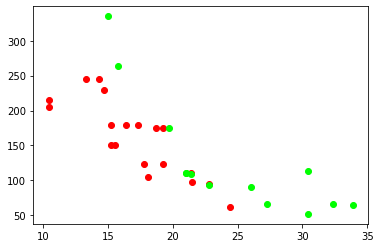

In [2]:
# Color por tripletas
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = (1.0, 0.0, 0.0))
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = (0.0, 1.0, 0.0))
plt.show()

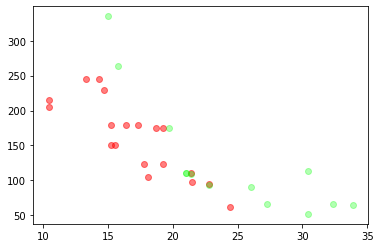

In [3]:
# Color por cuádruplas
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = (1.0, 0.0, 0.0, 0.5))
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = (0.0, 1.0, 0.0, 0.3))
plt.show()

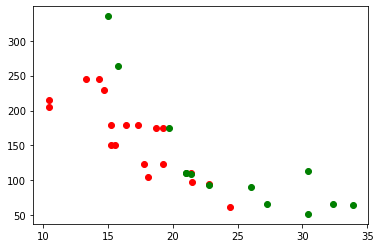

In [4]:
# Color por cuádruplas
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = "red")
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = "green")
plt.show()

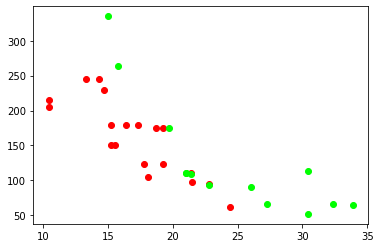

In [5]:
# Color por cadenas hexadecimales
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = "#FF0000")
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = "#00FF00")
plt.show()

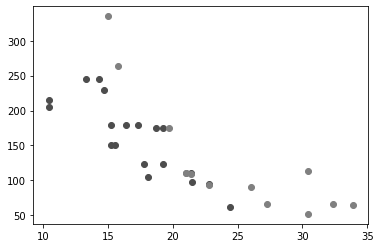

In [6]:
# Color por cadenas de escala de grises
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = "0.3")
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = "0.5")
plt.show()

<h3>Escalas de color</h3>

A no ser que nos encontremos ante un gráfico en el que todos los puntos (o grandes grupos de los mismos) son de un color fijo, establecer los colores de forma manual puede ser tedioso e incluso inviable. Para solucionar este problema, matplotlib nos permite llevar a cabo la definición de escalas de color o <b>colormaps</b>.

El módulo, nos da acceso a estas escalas a través de un submódulo llamado <b>matplotlib.cm</b>. Para ver un listado completo de las escalas de color ofrecidas por matplotlib, se puede consultar <a href="http://matplotlib.org/users/colormaps.html">este enlace</a> o <a href="http://matplotlib.org/gallery.html">este otro</a>.

Adicionalmente, habrá que establecer el mapeo que queremos hacer desde nuestros datos a los valores de la escala de color. matplotlib nos ofrece una serie de funciones de utilidad en el módulo <b>matplotlib.colors</b> para facilitar este mapeo.

<b>IMPORTANTE</b>: TODOS los colormap de matplotlib son continuos y el mapeo se realiza normalizando los valores de nuestra variable (continua o discreta) a un rango entre 0 y 1.

In [7]:
from matplotlib import cm
from matplotlib import colors

# Preparamos nuestros datos
dataset = diamonds.groupby('clarity').size()

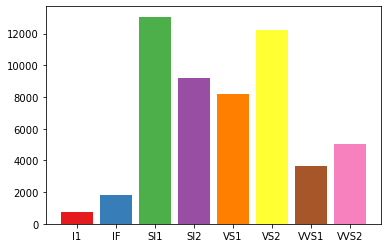

In [13]:
# Preparamos la escala de colores (para variable categórica)
normalizer = colors.Normalize(vmin = 0, vmax = dataset.size)
mapping = cm.ScalarMappable(norm=normalizer, cmap=cm.Set1)

# Pintamos nuestro gráfico con la nueva escala
plt.bar(dataset.index, dataset, color = mapping.to_rgba(np.arange(dataset.size)))
plt.show()

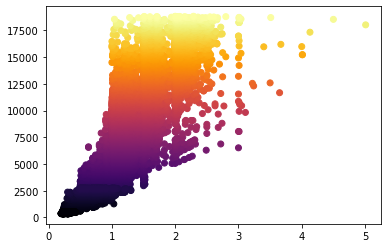

In [11]:
# Preparamos la escala de colores (para variable continua)
normalizer = colors.Normalize(vmin = diamonds.price.min(), vmax = diamonds.price.max())
mapping = cm.ScalarMappable(norm = normalizer, cmap = cm.inferno)

# Pintamos nuestro gráfico con los nuevos colores (escala continua en gráfico con colormap como parámetro)
plt.scatter(diamonds.carat, diamonds.price, color = mapping.to_rgba(diamonds.price))
plt.show()

<h2>Formas</h2>

De nuevo, matplotlib nos ofrece estilos por defecto para cada uno de los tipos gráfico que incluye. Sin embargo, ajustar estos estilos a nuestras necesidades, sobre todo de cara a la divulgación de nuestras visualizaciones es una buena práctica.

<h3>Marcadores y forma de punto</h3>

Aunque en ejemplos anteriores hemos visto cómo establecer la forma de los puntos de un gráfico mediante el uso de marcadores predefinidos, matplotlib nos permite definir nuestros propios marcadores de 3 formas adicionales:

<ul>
<li><b>Lista de vértices:</b> Lista de pares de valores indicando los vértices del polígono que queremos usar.</li>
<li><b>Polígono regular:</b> Mediante la tripleta (N, 0, angle) donde N es el número de lados y angle define una rotación.</li> 
<li><b>Estrella regular:</b> Mediante la tripleta (N, 1, angle) donde N es el número de puntas y angle define la rotación.</li>
</ul>

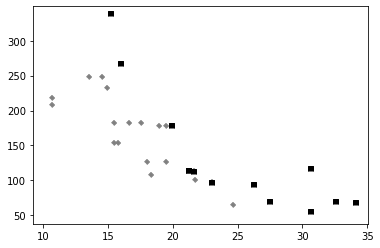

In [18]:
# Marcador por vértices
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = "0.5", 
            marker = [(0, 0.5), (0.5, 1), (1, 0.5), (0.5, 0)], s = 100)
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = "0.0",
            marker = [(0, 0), (0, 1), (1, 1), (1, 0)], s = 100)
plt.show()

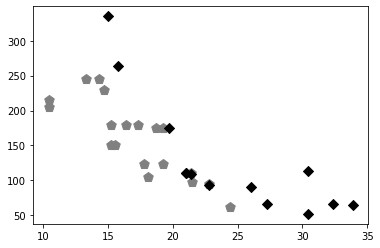

In [19]:
# Marcador por polígono
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = "0.5", 
            marker = (5, 0, 0), s = 100)
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = "0.0",
            marker = (4, 0, 0), s = 100)
plt.show()

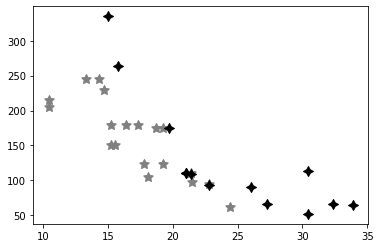

In [20]:
# Marcador por estrella
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = "0.5", 
            marker = (5, 1, 0), s = 100)
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = "0.0",
            marker = (4, 1, 0), s = 100)
plt.show()

<h2>Ejes</h2>

Al igual que otras librerías gráficas, matplotlib nos permite gestionar el modo en el que se establecen los ejes de nuestro gráfico.

<h3>Rango de los ejes</h3>

Como ocurre en casi todas las librerías gráficas, matplotlib ajustará el rango de cada eje a los valores mínimo y máximo de los datos subyacentes. Sin embargo, es posible modificar este funcionamiento y establecer manualmente la escala a visualizar.

Para realizar esto, disponemos de dos funciones: xlim e ylim que definen la tupla que fija los límites máximos y mínimos. Con estas dos funciones podremos introducir márgenes, ajustar la zona de datos y hacer zoom sobre nuestros datos originales.

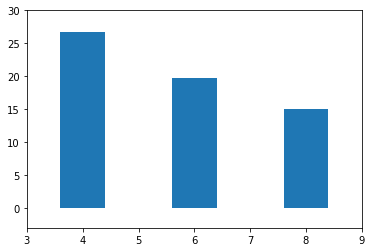

In [21]:
# Ajuste de escala
mpg_cyl = mtcars.groupby('cyl')['mpg'].mean()
plt.bar(mpg_cyl.index, mpg_cyl.values, align="center")
plt.xlim(3, 9)
plt.ylim(-3, 30)
plt.show()

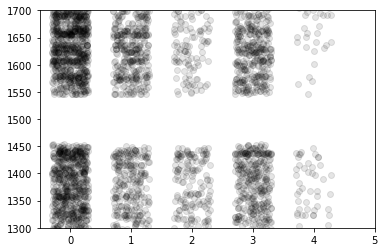

In [22]:
# Zoom
cuts = list(diamonds['cut'].unique())
x_values = [cuts.index(element) + np.random.uniform(-0.3, 0.3) for element in diamonds['cut']]
y_values = diamonds['price']
plt.scatter(x_values, y_values, color = "black", alpha = 0.1)
plt.xlim(-0.5, 5)
plt.ylim(1300, 1700)
plt.show()

<h3>Rejilla</h3>

Además de poder controlar los ticks y escalas de los ejes, tenemos la posibilidad de decidir si queremos o no mostrar la rejilla del gráfico de forma que se facilite la lectura e interpretación de los elementos renderizados. 

Para ello, matplotlib pone a nuestra disposición la función <b>grid</b>.

In [ ]:
# Rejilla gris y punteada
plt.scatter(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am == 0].hp, color = (1.0, 0.0, 0.0))
plt.scatter(mtcars[mtcars.am == 1].mpg, mtcars[mtcars.am == 1].hp, color = (0.0, 1.0, 0.0))
plt.grid(linewidth=1, linestyle="dotted", color = "0.7")
plt.show()